In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=1c73e14468d21a0aabf32e9edd08d621e309a7ed7d45d645e5a2a2b3d07fb31b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [1]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4441    0  4441    0     0  19112      0 --:--:-- --:--:-- --:--:-- 19060
100  517k  100  517k    0     0   874k      0 --:--:-- --:--:-- --:--:--  874k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4521    0  4521    0     0  21395      0 --:--:-- --:--:-- --:--:-- 21426
100  392k  100  392k    0     0   842k      0 --:--:-- --:--:-- --:--:--  842k


In [2]:
import talib as ta
import numpy as np
import pandas as pd
import yfinance as yf


# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

#Stat
from scipy import stats


#1) Model : ERW price prediction

#Part 1 : Model Development

## Import Historical price data of SPRC stock

In [3]:
"""tisco = yf.Ticker('tisco.bk')
interval = '15m'
start = '2023-11-6'
end = '2023-12-30'
tisco_price_df = tisco.history(interval=interval,start=start,end=end)
tisco_price_df
#tisco_price_df = pd.read_excel("/content/tisco-4-11to30-12.xlsx")
#tisco_price_df"""

'tisco = yf.Ticker(\'tisco.bk\')\ninterval = \'15m\'\nstart = \'2023-11-6\'\nend = \'2023-12-30\'\ntisco_price_df = tisco.history(interval=interval,start=start,end=end)\ntisco_price_df\n#tisco_price_df = pd.read_excel("/content/tisco-4-11to30-12.xlsx")\n#tisco_price_df'

In [4]:
#Import SPRC
sprc_df = pd.read_csv('/content/sprc_6-11 to 08_01.csv')
sprc_df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,0,0
1,2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,0,0
2,2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,0,0
3,2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,0,0
4,2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,0,0
...,...,...,...,...,...,...,...,...
753,2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,0,0
754,2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,0,0
755,2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,0,0
756,2024-01-05 16:00:00+07:00,8.50,8.55,8.45,8.45,462100,0,0


In [5]:
sprc_df.set_index('Datetime', inplace=True)
sprc_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,0,0
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,0,0
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,0,0
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,0,0
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,0,0
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,0,0
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,0,0
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,0,0


In [6]:
sprc_df= sprc_df[["Open","High","Low","Close","Volume"]]
sprc_df


,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380
...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419


## Define features


In [7]:
#Moving Average
sprc_df['SME'] = sprc_df['Close'].rolling(window=10).mean()
sprc_df

<ipython-input-7-122610b6ca85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sprc_df['SME'] = sprc_df['Close'].rolling(window=10).mean()


,Open,High,Low,Close,Volume,SME
Datetime,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN
...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565


In [8]:
#RSI
sprc_df['RSI'] = ta.RSI(np.array(sprc_df['Close']), timeperiod =14)
sprc_df

,Open,High,Low,Close,Volume,SME,RSI
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008


In [9]:
#Stochastic Oscillator
# Define periods
k_period = 14
d_period = 3
# Adds a "n_high" column with max value of previous 14 periods
sprc_df['n_high'] = sprc_df['High'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
sprc_df['n_low'] = sprc_df['Low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
sprc_df['%K'] = (sprc_df['Close'] - sprc_df['n_low']) * 100 / (sprc_df['n_high'] - sprc_df['n_low'])
# Uses the %k to calculates a SMA over the past 3 values of %k
sprc_df['%D'] = sprc_df['%K'].rolling(d_period).mean()
sprc_df["Stochastic"] = sprc_df['%K'] - sprc_df['%D']

sprc_df =sprc_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI','%K', '%D', 'Stochastic']]

sprc_df


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic
Datetime,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937


In [10]:
#Stochastic Correlation
sprc_df['Sto_Corr'] = sprc_df['Close'].rolling(window=14).corr(sprc_df['Stochastic'])

sprc_df



<ipython-input-10-5a409a999287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sprc_df['Sto_Corr'] = sprc_df['Close'].rolling(window=14).corr(sprc_df['Stochastic'])


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr
Datetime,,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920


In [11]:
#Volatility
ret = 100 * (sprc_df.pct_change()[1:]['Close'])
sprc_df['Volatility'] = ret.rolling(5).std()
sprc_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility
Datetime,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317


In [12]:
"""#Index Price
set50 = yf.Ticker('^SET50.BK')
interval = '15m'
start = '2023-11-6'
end = '2023-12-30'
set50_df = set50.history(interval=interval,start=start,end=end)"""


"#Index Price\nset50 = yf.Ticker('^SET50.BK')\ninterval = '15m'\nstart = '2023-11-6'\nend = '2023-12-30'\nset50_df = set50.history(interval=interval,start=start,end=end)"

In [13]:
set100 = pd.read_csv("/content/set100_06-11 to 08-01.csv")
set100

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-11-06 10:00:00+07:00,1960.069946,1963.719971,1959.209961,1962.109985,0,0,0
1,2023-11-06 10:15:00+07:00,1962.060059,1962.060059,1956.250000,1956.780029,0,0,0
2,2023-11-06 10:30:00+07:00,1957.319946,1958.020020,1954.150024,1956.290039,0,0,0
3,2023-11-06 10:45:00+07:00,1955.829956,1956.229980,1950.579956,1952.219971,0,0,0
4,2023-11-06 11:00:00+07:00,1951.609985,1951.660034,1944.589966,1948.839966,0,0,0
...,...,...,...,...,...,...,...,...
793,2024-01-05 15:15:00+07:00,1944.420044,1946.020020,1940.910034,1941.689941,0,0,0
794,2024-01-05 15:30:00+07:00,1942.890015,1944.479980,1940.300049,1942.380005,0,0,0
795,2024-01-05 15:45:00+07:00,1942.459961,1944.310059,1940.819946,1941.170044,0,0,0
796,2024-01-05 16:00:00+07:00,1942.699951,1943.420044,1937.869995,1938.969971,0,0,0


In [14]:
set100.set_index('Datetime', inplace=True)
set100

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,1960.069946,1963.719971,1959.209961,1962.109985,0,0,0
2023-11-06 10:15:00+07:00,1962.060059,1962.060059,1956.250000,1956.780029,0,0,0
2023-11-06 10:30:00+07:00,1957.319946,1958.020020,1954.150024,1956.290039,0,0,0
2023-11-06 10:45:00+07:00,1955.829956,1956.229980,1950.579956,1952.219971,0,0,0
2023-11-06 11:00:00+07:00,1951.609985,1951.660034,1944.589966,1948.839966,0,0,0
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,1944.420044,1946.020020,1940.910034,1941.689941,0,0,0
2024-01-05 15:30:00+07:00,1942.890015,1944.479980,1940.300049,1942.380005,0,0,0
2024-01-05 15:45:00+07:00,1942.459961,1944.310059,1940.819946,1941.170044,0,0,0


In [15]:
sprc_df["Index_Price"] = set100['Close']
sprc_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price
Datetime,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044


In [16]:
#MACD

# # Calculate MACD values using the pandas_ta library
# df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)

# Get the 26-day EMA of the closing price
k = sprc_df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

# Get the 12-day EMA of the closing price
d = sprc_df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d

# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s

# Add all of our new values for the MACD to the dataframe
sprc_df['MACD_Con_Di'] = sprc_df.index.map(macd_h)


sprc_df



,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di
Datetime,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675


In [17]:
# SAR
sprc_df['SAR'] = ta.SAR(sprc_df.High.values, sprc_df.Low.values, acceleration = 0.02, maximum = 0.2)
sprc_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,7.950000
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,8.050000
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,8.050000
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,8.047000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200


## EDA and prepare data

Check data type

In [18]:

sprc_df.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume           int64
SME            float64
RSI            float64
%K             float64
%D             float64
Stochastic     float64
Sto_Corr       float64
Volatility     float64
Index_Price    float64
MACD_Con_Di    float64
SAR            float64
dtype: object

In [19]:
# Check if there are any infinity values in each column
# Check for infinity values in the DataFrame
is_infinity = np.isinf(sprc_df)
for column in sprc_df.columns:
    has_infinity = is_infinity[column].any()
    if has_infinity:
        print(f"Column '{column}' contains infinity values.")
    else:
        print(f"Column '{column}' does not contain infinity values.")

Column 'Open' does not contain infinity values.
Column 'High' does not contain infinity values.
Column 'Low' does not contain infinity values.
Column 'Close' does not contain infinity values.
Column 'Volume' does not contain infinity values.
Column 'SME' does not contain infinity values.
Column 'RSI' does not contain infinity values.
Column '%K' does not contain infinity values.
Column '%D' does not contain infinity values.
Column 'Stochastic' does not contain infinity values.
Column 'Sto_Corr' contains infinity values.
Column 'Volatility' does not contain infinity values.
Column 'Index_Price' does not contain infinity values.
Column 'MACD_Con_Di' does not contain infinity values.
Column 'SAR' does not contain infinity values.


Fill infinity value

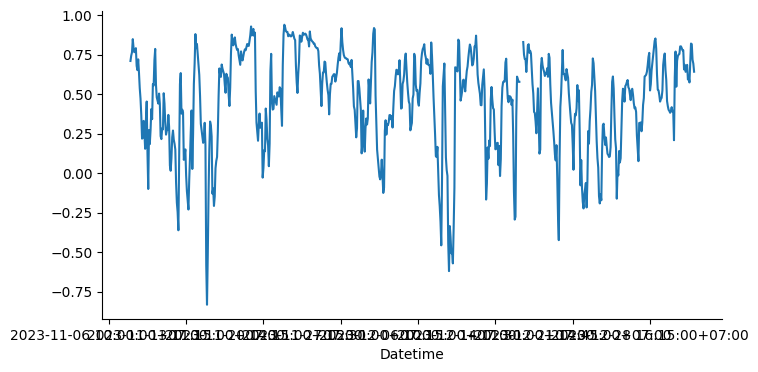

In [20]:
from matplotlib import pyplot as plt
sprc_df['Sto_Corr'].plot(kind='line', figsize=(8, 4))
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
def replace_negative_infinity(df, replacement_value):
    # Replace negative infinity with the specified value
    df.replace(-np.inf, replacement_value, inplace=True)
    return df

replacement_value = -1.0  # You can replace this with any value you want

result = replace_negative_infinity(sprc_df, replacement_value)


def replace_positive_infinity(df, replacement_value):
    # Replace negative infinity with the specified value
    df.replace(np.inf, replacement_value, inplace=True)
    return df

replacement_value = 1.0  # You can replace this with any value you want

result = replace_positive_infinity(sprc_df, replacement_value)

# Check for infinity values in the DataFrame
is_infinity = np.isinf(result)
for column in result.columns:
    has_infinity = is_infinity[column].any()
    if has_infinity:
        print(f"Column '{column}' contains infinity values.")
    else:
        print(f"Column '{column}' does not contain infinity values.")


sprc_df= result
sprc_df

Column 'Open' does not contain infinity values.
Column 'High' does not contain infinity values.
Column 'Low' does not contain infinity values.
Column 'Close' does not contain infinity values.
Column 'Volume' does not contain infinity values.
Column 'SME' does not contain infinity values.
Column 'RSI' does not contain infinity values.
Column '%K' does not contain infinity values.
Column '%D' does not contain infinity values.
Column 'Stochastic' does not contain infinity values.
Column 'Sto_Corr' does not contain infinity values.
Column 'Volatility' does not contain infinity values.
Column 'Index_Price' does not contain infinity values.
Column 'MACD_Con_Di' does not contain infinity values.
Column 'SAR' does not contain infinity values.


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,7.950000
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,8.050000
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,8.050000
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,8.047000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200


Check Nan Value

In [22]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(sprc_df)

NaN values found in the following columns:
SME: 9 NaN values
RSI: 14 NaN values
%K: 13 NaN values
%D: 15 NaN values
Stochastic: 15 NaN values
Sto_Corr: 29 NaN values
Volatility: 5 NaN values
Index_Price: 2 NaN values
MACD_Con_Di: 33 NaN values
SAR: 1 NaN values


In [23]:
# Check index of Nan Value
def get_nan_indices_for_column(dataframe, column_name):
    nan_indices = dataframe[dataframe[column_name].isna()].index

    if len(nan_indices) == 0:
        print(f"No NaN values found in the '{column_name}' column.")
    else:
        print(f"Indices of NaN values in the '{column_name}' column:")
        for index in nan_indices:
            print(index)

get_nan_indices_for_column(sprc_df, "Sto_Corr")



Indices of NaN values in the 'Sto_Corr' column:
2023-11-06 10:00:00+07:00
2023-11-06 10:15:00+07:00
2023-11-06 10:30:00+07:00
2023-11-06 10:45:00+07:00
2023-11-06 11:00:00+07:00
2023-11-06 11:15:00+07:00
2023-11-06 11:30:00+07:00
2023-11-06 11:45:00+07:00
2023-11-06 12:00:00+07:00
2023-11-06 12:15:00+07:00
2023-11-06 14:15:00+07:00
2023-11-06 14:30:00+07:00
2023-11-06 14:45:00+07:00
2023-11-06 15:00:00+07:00
2023-11-06 15:15:00+07:00
2023-11-06 15:30:00+07:00
2023-11-06 15:45:00+07:00
2023-11-06 16:00:00+07:00
2023-11-06 16:15:00+07:00
2023-11-07 10:00:00+07:00
2023-11-07 10:15:00+07:00
2023-11-07 10:30:00+07:00
2023-11-07 10:45:00+07:00
2023-11-07 11:00:00+07:00
2023-11-07 11:15:00+07:00
2023-11-07 11:30:00+07:00
2023-11-07 11:45:00+07:00
2023-11-07 12:00:00+07:00
2023-12-18 10:00:00+07:00


EDA data distribution for 'Index_Price'

Shapiro-Wilk test statistic: nan, p-value: 1.0
The data follows a normal distribution (Do not reject H0)


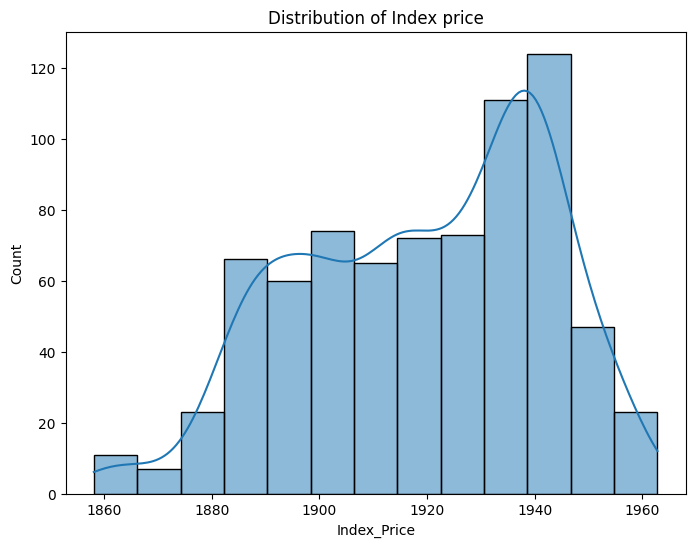

In [24]:
#Data distribution for 'Index_Price'

# Check normality using Shapiro-Wilk test
stat, p_value = stats.shapiro(sprc_df['Index_Price'])
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')

# Set significance level
alpha = 0.05

# Check normality based on p-value
if p_value > alpha:
    print("The data follows a normal distribution (Do not reject H0)")
else:
    print("The data does not follow a normal distribution (Do not reject H0)")

# Visualize distribution
plt.figure(figsize=(8, 6))
sns.histplot(sprc_df['Index_Price'], kde=True)
plt.title("Distribution of Index price")
plt.show()

Plot graph to find relationship between Index price and ERW closing price

Original DataFrame:
                           Open  High   Low  Close   Volume    SME        RSI  \
Datetime                                                                        
2023-11-06 10:00:00+07:00  8.05  8.05  8.00   8.05   187700    NaN        NaN   
2023-11-06 10:15:00+07:00  8.00  8.05  7.95   8.00  2217900    NaN        NaN   
2023-11-06 10:30:00+07:00  8.00  8.00  7.90   7.95  4709220    NaN        NaN   
2023-11-06 10:45:00+07:00  7.95  7.95  7.95   7.95   285806    NaN        NaN   
2023-11-06 11:00:00+07:00  7.95  8.00  7.90   7.95  6822380    NaN        NaN   
...                         ...   ...   ...    ...      ...    ...        ...   
2024-01-05 15:15:00+07:00  8.60  8.65  8.50   8.55  2891525  8.575  50.617223   
2024-01-05 15:30:00+07:00  8.55  8.60  8.45   8.50  3804060  8.570  46.593009   
2024-01-05 15:45:00+07:00  8.55  8.55  8.45   8.55  1084419  8.565  50.805008   
2024-01-05 16:00:00+07:00  8.50  8.55  8.45   8.45   462100  8.555  43.428082   
2024-01-

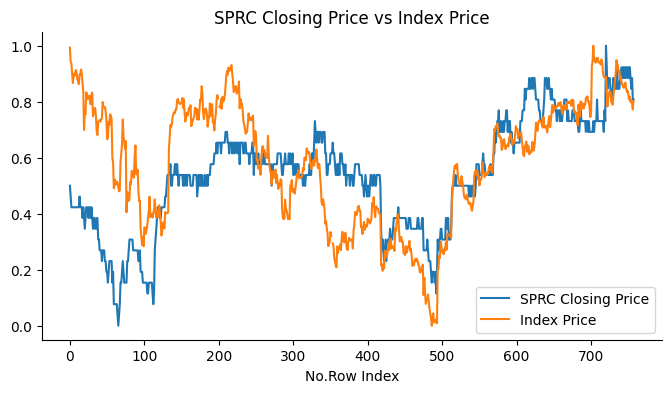

In [25]:
# Function to normalize the DataFrame
def normalize_dataframe(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_normalized

# Normalize the DataFrame
normalized_df = normalize_dataframe(sprc_df)

# Display the original and normalized DataFrames
print("Original DataFrame:")
print(sprc_df)
print("\nNormalized DataFrame:")
print(normalized_df)

#Plot Closing price of ERW stock and Index price
# Assuming normalized_df is your DataFrame
ax = normalized_df[['Close', 'Index_Price']].plot(kind='line', figsize=(8, 4), title='SPRC Closing Price vs Index Price')
ax.spines[['top', 'right']].set_visible(False)

# Adding x-axis label
plt.xlabel('No.Row Index')

# Adding legends for each line
ax.legend(['SPRC Closing Price', 'Index Price'])

plt.show()

Drop Nan data for SME,RSI,Stochastic,Volatility,and MACD





In [26]:
#Check dataframe
sprc_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,7.950000
2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,8.050000
2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,8.050000
2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,8.047000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000
2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000
2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200


In [27]:
sprc_df.reset_index(drop=False, inplace=True)
sprc_df

,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,2023-11-06 10:00:00+07:00,8.05,8.05,8.00,8.05,187700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
1,2023-11-06 10:15:00+07:00,8.00,8.05,7.95,8.00,2217900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,7.950000
2,2023-11-06 10:30:00+07:00,8.00,8.00,7.90,7.95,4709220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,8.050000
3,2023-11-06 10:45:00+07:00,7.95,7.95,7.95,7.95,285806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,8.050000
4,2023-11-06 11:00:00+07:00,7.95,8.00,7.90,7.95,6822380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,8.047000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000
754,2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000
755,2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200
756,2024-01-05 16:00:00+07:00,8.50,8.55,8.45,8.45,462100,8.555,43.428082,0.000000,25.000119,-25.000119,0.694561,0.785108,1938.969971,-0.015427,8.721872


In [28]:
sprc_df = sprc_df.drop(range(33))
sprc_df.reset_index(drop=False, inplace=True)
sprc_df


,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,7.85,7.90,7.85,7.90,55820,7.915,44.108780,50.000238,33.333492,16.666746,0.766683,0.632927,1939.199951,-0.001097,7.950000
1,34,2023-11-07 15:30:00+07:00,7.85,7.90,7.85,7.85,37093,7.905,39.083540,0.000000,33.333492,-33.333492,0.780260,0.567008,1939.500000,-0.003606,7.948000
2,35,2023-11-07 15:45:00+07:00,7.85,7.95,7.85,7.85,1009800,7.900,39.083540,0.000000,16.666746,-16.666746,0.792667,0.530980,1936.099976,-0.004808,7.850000
3,36,2023-11-07 16:00:00+07:00,7.85,7.95,7.85,7.90,603300,7.895,46.193047,50.000238,16.666746,33.333492,0.680406,0.531462,1930.489990,-0.001926,7.950000
4,37,2023-11-07 16:15:00+07:00,7.90,7.90,7.85,7.90,70903,7.890,46.193047,50.000238,33.333492,16.666746,0.653425,0.448964,1929.369995,0.000178,7.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,753,2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000
721,754,2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000
722,755,2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200
723,756,2024-01-05 16:00:00+07:00,8.50,8.55,8.45,8.45,462100,8.555,43.428082,0.000000,25.000119,-25.000119,0.694561,0.785108,1938.969971,-0.015427,8.721872


Imputation for Price Index

In [29]:
# Choose the column with missing data
column_with_missing_data = 'Index_Price'

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the specified column
sprc_df[column_with_missing_data] = imputer.fit_transform(sprc_df[[column_with_missing_data]])

sprc_df


,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,7.85,7.90,7.85,7.90,55820,7.915,44.108780,50.000238,33.333492,16.666746,0.766683,0.632927,1939.199951,-0.001097,7.950000
1,34,2023-11-07 15:30:00+07:00,7.85,7.90,7.85,7.85,37093,7.905,39.083540,0.000000,33.333492,-33.333492,0.780260,0.567008,1939.500000,-0.003606,7.948000
2,35,2023-11-07 15:45:00+07:00,7.85,7.95,7.85,7.85,1009800,7.900,39.083540,0.000000,16.666746,-16.666746,0.792667,0.530980,1936.099976,-0.004808,7.850000
3,36,2023-11-07 16:00:00+07:00,7.85,7.95,7.85,7.90,603300,7.895,46.193047,50.000238,16.666746,33.333492,0.680406,0.531462,1930.489990,-0.001926,7.950000
4,37,2023-11-07 16:15:00+07:00,7.90,7.90,7.85,7.90,70903,7.890,46.193047,50.000238,33.333492,16.666746,0.653425,0.448964,1929.369995,0.000178,7.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,753,2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000
721,754,2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000
722,755,2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200
723,756,2024-01-05 16:00:00+07:00,8.50,8.55,8.45,8.45,462100,8.555,43.428082,0.000000,25.000119,-25.000119,0.694561,0.785108,1938.969971,-0.015427,8.721872


Check NaN again

In [30]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(sprc_df)

NaN values found in the following columns:
Sto_Corr: 1 NaN values


Imputation for Sto_Corr

In [31]:
# Choose the column with missing data
column_with_missing_data = 'Sto_Corr'

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the specified column
sprc_df[column_with_missing_data] = imputer.fit_transform(sprc_df[[column_with_missing_data]])

sprc_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,7.85,7.90,7.85,7.90,55820,7.915,44.108780,50.000238,33.333492,16.666746,0.766683,0.632927,1939.199951,-0.001097,7.950000
1,34,2023-11-07 15:30:00+07:00,7.85,7.90,7.85,7.85,37093,7.905,39.083540,0.000000,33.333492,-33.333492,0.780260,0.567008,1939.500000,-0.003606,7.948000
2,35,2023-11-07 15:45:00+07:00,7.85,7.95,7.85,7.85,1009800,7.900,39.083540,0.000000,16.666746,-16.666746,0.792667,0.530980,1936.099976,-0.004808,7.850000
3,36,2023-11-07 16:00:00+07:00,7.85,7.95,7.85,7.90,603300,7.895,46.193047,50.000238,16.666746,33.333492,0.680406,0.531462,1930.489990,-0.001926,7.950000
4,37,2023-11-07 16:15:00+07:00,7.90,7.90,7.85,7.90,70903,7.890,46.193047,50.000238,33.333492,16.666746,0.653425,0.448964,1929.369995,0.000178,7.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,753,2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000
721,754,2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000
722,755,2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200
723,756,2024-01-05 16:00:00+07:00,8.50,8.55,8.45,8.45,462100,8.555,43.428082,0.000000,25.000119,-25.000119,0.694561,0.785108,1938.969971,-0.015427,8.721872


In [32]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(sprc_df)

No NaN values found in any column.


## Define Target Variable
If closing price next 15 minute is higher than current closing price, then we will buy the stock (1), else we will sell it (-1).

In [33]:
sprc_df["y"] = np.where(sprc_df['Close'].shift(-1) > sprc_df['Close'],1,-1)
sprc_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR,y
0,33,2023-11-07 15:15:00+07:00,7.85,7.90,7.85,7.90,55820,7.915,44.108780,50.000238,33.333492,16.666746,0.766683,0.632927,1939.199951,-0.001097,7.950000,-1
1,34,2023-11-07 15:30:00+07:00,7.85,7.90,7.85,7.85,37093,7.905,39.083540,0.000000,33.333492,-33.333492,0.780260,0.567008,1939.500000,-0.003606,7.948000,-1
2,35,2023-11-07 15:45:00+07:00,7.85,7.95,7.85,7.85,1009800,7.900,39.083540,0.000000,16.666746,-16.666746,0.792667,0.530980,1936.099976,-0.004808,7.850000,1
3,36,2023-11-07 16:00:00+07:00,7.85,7.95,7.85,7.90,603300,7.895,46.193047,50.000238,16.666746,33.333492,0.680406,0.531462,1930.489990,-0.001926,7.950000,-1
4,37,2023-11-07 16:15:00+07:00,7.90,7.90,7.85,7.90,70903,7.890,46.193047,50.000238,33.333492,16.666746,0.653425,0.448964,1929.369995,0.000178,7.950000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,753,2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000,-1
721,754,2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000,1
722,755,2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200,-1
723,756,2024-01-05 16:00:00+07:00,8.50,8.55,8.45,8.45,462100,8.555,43.428082,0.000000,25.000119,-25.000119,0.694561,0.785108,1938.969971,-0.015427,8.721872,-1


## Create Final Dataframe for Train Model

In [34]:
#tisco_price_df = erw_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI', '%K', '%D',
#    'Stochastic', 'Volatility', 'Sto_Corr', 'Index_Price', 'MACD_Con_Di','SAR','y']]
sprc_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR,y
0,33,2023-11-07 15:15:00+07:00,7.85,7.90,7.85,7.90,55820,7.915,44.108780,50.000238,33.333492,16.666746,0.766683,0.632927,1939.199951,-0.001097,7.950000,-1
1,34,2023-11-07 15:30:00+07:00,7.85,7.90,7.85,7.85,37093,7.905,39.083540,0.000000,33.333492,-33.333492,0.780260,0.567008,1939.500000,-0.003606,7.948000,-1
2,35,2023-11-07 15:45:00+07:00,7.85,7.95,7.85,7.85,1009800,7.900,39.083540,0.000000,16.666746,-16.666746,0.792667,0.530980,1936.099976,-0.004808,7.850000,1
3,36,2023-11-07 16:00:00+07:00,7.85,7.95,7.85,7.90,603300,7.895,46.193047,50.000238,16.666746,33.333492,0.680406,0.531462,1930.489990,-0.001926,7.950000,-1
4,37,2023-11-07 16:15:00+07:00,7.90,7.90,7.85,7.90,70903,7.890,46.193047,50.000238,33.333492,16.666746,0.653425,0.448964,1929.369995,0.000178,7.950000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,753,2024-01-05 15:15:00+07:00,8.60,8.65,8.50,8.55,2891525,8.575,50.617223,33.333545,44.444727,-11.111182,0.821615,0.638751,1941.689941,-0.005547,8.750000,-1
721,754,2024-01-05 15:30:00+07:00,8.55,8.60,8.45,8.50,3804060,8.570,46.593009,25.000119,41.666918,-16.666799,0.817613,0.639374,1942.380005,-0.010226,8.745000,1
722,755,2024-01-05 15:45:00+07:00,8.55,8.55,8.45,8.55,1084419,8.565,50.805008,50.000239,36.111301,13.888937,0.718920,0.640317,1941.170044,-0.009675,8.733200,-1
723,756,2024-01-05 16:00:00+07:00,8.50,8.55,8.45,8.45,462100,8.555,43.428082,0.000000,25.000119,-25.000119,0.694561,0.785108,1938.969971,-0.015427,8.721872,-1


## Explore imbalance target data

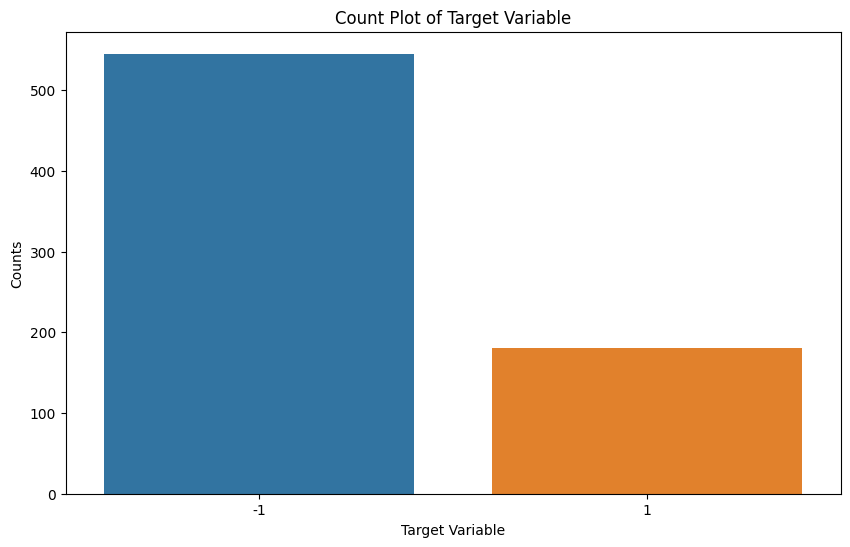

In [35]:
# Use Seaborn to count and plot
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data= sprc_df)
plt.xlabel('Target Variable')
plt.ylabel('Counts')
plt.title('Count Plot of Target Variable')
plt.show()




## Data Splitting and scale data for train and test model

In [36]:
X = sprc_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI', '%K', '%D',
       'Stochastic', 'Sto_Corr', 'Volatility','MACD_Con_Di','SAR','Index_Price']]
y = sprc_df['y']

In [37]:
#Generate Train/Test dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=123)

In [38]:
X_train

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,MACD_Con_Di,SAR,Index_Price
188,8.20,8.25,8.20,8.20,31500,8.235,46.239586,0.000000,22.222222,-22.222222,0.545125,0.508395,-0.009963,8.330219,1946.170044
303,8.30,8.30,8.25,8.30,233228,8.275,60.059463,79.999924,76.666588,3.333336,0.594442,0.505760,0.010314,8.183998,1913.900024
226,8.15,8.20,8.15,8.15,24706,8.155,44.924948,33.332910,33.332910,0.000000,0.803306,0.000000,-0.001704,8.220110,1925.270020
221,8.15,8.20,8.15,8.15,10900,8.180,44.924948,33.332910,44.444092,-11.111182,0.884780,0.511503,-0.003020,8.232876,1917.239990
460,7.60,7.65,7.55,7.65,2067700,7.635,43.081596,50.000000,35.555560,14.444439,0.172615,1.039588,-0.004168,7.700000,1859.040039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,8.10,8.10,8.05,8.10,880450,8.085,47.888536,66.667090,66.667090,0.000000,0.227904,0.277773,0.001778,8.142741,1922.959961
523,8.20,8.20,8.15,8.15,2517,8.135,60.551260,74.999881,83.333254,-8.333373,0.334756,0.512855,0.004869,8.033250,1915.579956
454,7.55,7.65,7.55,7.65,526903,7.705,32.845728,28.571409,14.285682,14.285727,0.173954,0.547369,-0.014725,7.784275,1860.920044
59,7.75,7.75,7.70,7.70,226600,7.755,47.903717,24.999881,44.999973,-20.000092,0.565278,0.288526,-0.005574,7.666000,1908.660034


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaler for whole data set

In [40]:
from sklearn.preprocessing import StandardScaler
all_scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = all_scaler.fit_transform(X)


## Logistic Regression Model

In [47]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


logis_model = LogisticRegression(random_state =123,verbose =1,max_iter = 1000,class_weight = 'balanced')

solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
c_values = np.logspace(-2, 2, 100)
penalty = ['l2']


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logis_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled , y_train)




GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=123,
                                          verbose=1),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.351602...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [48]:
from sklearn.metrics import roc_auc_score
# Get the best estimator from the search
best_logis_model = grid_search.best_estimator_

print("Best parameter")
print(grid_search.best_params_)



# Predict on the test set
logis_y_pred_prob = best_logis_model.predict_proba(X_test_scaled)[:, 1]


# Calculate ROC-AUC score
logis_roc_auc = roc_auc_score(y_test, logis_y_pred_prob)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {logis_roc_auc}")



Best parameter
{'C': 0.8697490026177834, 'penalty': 'l2', 'solver': 'newton-cg'}
ROC-AUC Score: 0.7469418960244648


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score


# Make predictions on the test set
logis_y_pred = best_logis_model.predict(X_test_scaled)

# Calculate the confusion matrix
logis_conf_matrix = confusion_matrix(y_test,logis_y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(logis_conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, logis_y_pred)
print("\nAccuracy:", accuracy)

#F-1 score
logis_f1_test = f1_score(y_test, logis_y_pred)
print('The f1 score for the testing data:', logis_f1_test)


Confusion Matrix:
[[78 31]
 [14 22]]

Accuracy: 0.6896551724137931
The f1 score for the testing data: 0.4943820224719102


In [50]:
print(metrics.classification_report(y_test, logis_y_pred))

              precision    recall  f1-score   support

          -1       0.85      0.72      0.78       109
           1       0.42      0.61      0.49        36

    accuracy                           0.69       145
   macro avg       0.63      0.66      0.64       145
weighted avg       0.74      0.69      0.71       145



Final Train model with all X data

In [51]:
final_logis = LogisticRegression(random_state =123,verbose =1,max_iter = 1000,class_weight = 'balanced', n_jobs=-1, C =0.8697490026177834, penalty ='l2',solver ='newton-cg')
final_logis.fit(X_scaled,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(C=0.8697490026177834, class_weight='balanced', max_iter=1000,
                   n_jobs=-1, random_state=123, solver='newton-cg', verbose=1)